#find table that has all player info

In [1]:
# import dependencies
from nba_api.stats.endpoints import commonplayerinfo
import pandas as pd
import json
import pprint as pp
import time

# Testing of API

In [2]:
#testing nba_api to get 1 results.
player_info = commonplayerinfo.CommonPlayerInfo(player_id=1626153)
bron = player_info.get_dict()
bron
player_info.common_player_info.get_data_frame()

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1626153,Delon,Wright,Delon Wright,"Wright, Delon",D. Wright,delon-wright,1992-04-26T00:00:00,Utah,USA,...,delon_wright,2015,2022,Y,Y,Y,2015,1,20,N


# API Pull
## Importing team variables and saving to dataframe

In [3]:
# get team IDs

from nba_api.stats.static import teams

nba_teams = teams.get_teams()
team_df = pd.DataFrame(nba_teams)
# print(team_df)

print(f'teams variables: {list(team_df)}')
print()

team_ids = []
for i in team_df.index:
#     print(team_df.iloc[i]['id'])
    team_ids.append(team_df.iloc[i]['id'])
    
print(team_ids)

teams variables: ['abbreviation', 'city', 'full_name', 'id', 'nickname', 'state', 'year_founded']

[1610612737, 1610612738, 1610612739, 1610612740, 1610612741, 1610612742, 1610612743, 1610612744, 1610612745, 1610612746, 1610612747, 1610612748, 1610612749, 1610612750, 1610612751, 1610612752, 1610612753, 1610612754, 1610612755, 1610612756, 1610612757, 1610612758, 1610612759, 1610612760, 1610612761, 1610612762, 1610612763, 1610612764, 1610612765, 1610612766]


In [4]:
# create df with team id, name, and location
team_df = team_df.loc[:,['id','full_name','city']]
team_df = team_df.rename(columns={'id':'Team ID','full_name':'Team Name','city':'City'})
team_df.head()

,Team ID,Team Name,City
0,1610612737,Atlanta Hawks,Atlanta
1,1610612738,Boston Celtics,Boston
2,1610612739,Cleveland Cavaliers,Cleveland
3,1610612740,New Orleans Pelicans,New Orleans
4,1610612741,Chicago Bulls,Chicago


## Running function to pull player data only for players that played on team id for the 2021-22 season

In [5]:
# get players by team roster for 2021-22
# api library
from nba_api.stats.endpoints import commonteamroster

# initalize lists for constructing dictionary
t_id = []
player_name = []
height = []
weight = []
birthday = []
age = []
school = []
player_id = []
failed_ids = []

# function to request team roster data
def roster_api(id):
    # api call
        data = commonteamroster.CommonTeamRoster(team_id=id,season='2021-22')

        # convert to dictonary format
        data_dict = data.get_dict()

        # store results
        results = data_dict['resultSets'][0]

        # store team roster
        roster = results['rowSet']
        print()

        # iterate through roster to save player info in lists by index number
        for player in roster:

            t_id.append(player[0])
            player_name.append(player[3])
            height.append(player[8])
            weight.append(player[9])
            birthday.append(player[10])
            age.append(player[11])
            school.append(player[13])
            player_id.append(player[14])

        print(f'download for {id} successful')
        print('*****************************')
        print()


# iterate through team ids to download rosters for 2021-22
for id in team_ids:
    print(f'processing data for team id: {id}')
    
    # if first two requests for data fails, store list of failed team_IDs
    try:
        roster_api(id)
    except Exception as e:
        print(e)
        try:
            roster_api(id)
        except Exception as e:
            print(e)
            failed_ids.append(id)
            pass
        
print(failed_ids)

processing data for team id: 1610612737

download for 1610612737 successful
*****************************

processing data for team id: 1610612738

download for 1610612738 successful
*****************************

processing data for team id: 1610612739

download for 1610612739 successful
*****************************

processing data for team id: 1610612740

download for 1610612740 successful
*****************************

processing data for team id: 1610612741

download for 1610612741 successful
*****************************

processing data for team id: 1610612742

download for 1610612742 successful
*****************************

processing data for team id: 1610612743

download for 1610612743 successful
*****************************

processing data for team id: 1610612744

download for 1610612744 successful
*****************************

processing data for team id: 1610612745

download for 1610612745 successful
*****************************

processing data for team id: 16106127

In [6]:
# iterate over failed APIs for missing data
for id in failed_ids:
    print(f'processing data for team id: {id}')
    
    # if first two requests for data fails, store list of failed team_IDs
    try:
        roster_api(id)
    except Exception as e:
        print(e)
        try:
            roster_api(id)
        except Exception as e:
            print(e)
            failed_again_ids.append(id)
            pass

In [7]:
# create dictionary
player_dict = {
    'Player ID': player_id,
    'Player Name': player_name,
    'Height': height,
    'Weight': weight,
    'Birthday': birthday,
    'Age': age,
    'School': school,
    'Team ID': t_id
}

# convert dictionary to dataframe
player_df = pd.DataFrame(player_dict)

# show results
player_df

,Player ID,Player Name,Height,Weight,Birthday,Age,School,Team ID
0,1626153,Delon Wright,6-5,185,"APR 26, 1992",30.0,Utah,1610612737
1,1630552,Jalen Johnson,6-8,219,"DEC 18, 2001",20.0,Duke,1610612737
2,1630536,Sharife Cooper,6-1,176,"JUN 11, 2001",21.0,Auburn,1610612737
3,1628989,Kevin Huerter,6-7,198,"AUG 27, 1998",23.0,Maryland,1610612737
4,1630219,Skylar Mays,6-4,205,"SEP 05, 1997",24.0,Louisiana State,1610612737
5,1628995,Kevin Knox II,6-7,215,"AUG 11, 1999",22.0,Kentucky,1610612737
6,101150,Lou Williams,6-2,175,"OCT 27, 1986",35.0,South Gwinnett HS (GA),1610612737
7,1627789,Timothe Luwawu-Cabarrot,6-7,215,"MAY 09, 1995",27.0,,1610612737
8,201568,Danilo Gallinari,6-10,236,"AUG 08, 1988",33.0,Olimpia Milano,1610612737
9,203476,Gorgui Dieng,6-10,248,"JAN 18, 1990",32.0,Louisville,1610612737


## Joining the players for 2021-22 season to their teams

In [8]:
# merge tables
teams_players_df = pd.merge(player_df,team_df,how='left',on='Team ID')
teams_players_df.head()

,Player ID,Player Name,Height,Weight,Birthday,Age,School,Team ID,Team Name,City
0,1626153,Delon Wright,6-5,185,"APR 26, 1992",30.0,Utah,1610612737,Atlanta Hawks,Atlanta
1,1630552,Jalen Johnson,6-8,219,"DEC 18, 2001",20.0,Duke,1610612737,Atlanta Hawks,Atlanta
2,1630536,Sharife Cooper,6-1,176,"JUN 11, 2001",21.0,Auburn,1610612737,Atlanta Hawks,Atlanta
3,1628989,Kevin Huerter,6-7,198,"AUG 27, 1998",23.0,Maryland,1610612737,Atlanta Hawks,Atlanta
4,1630219,Skylar Mays,6-4,205,"SEP 05, 1997",24.0,Louisiana State,1610612737,Atlanta Hawks,Atlanta


## Get the player IDs from the teams_players_df and look up their draft data from the common player info table.

In [9]:
# get existing player id list from player data frame
#turns series into list
player_id = player_df['Player ID'].tolist()

draft_pick = pd.DataFrame()
failed_ids = []
for i in player_id:
    try:
        player_info = commonplayerinfo.CommonPlayerInfo(player_id=i)
        draft_pick = draft_pick.append(player_info.common_player_info.get_data_frame(),ignore_index=True)
    except Exception as e:
        print(e)
        print(i)
        failed_ids.append(i)
    time.sleep(1)

# df of players from the 2021-22 season and their draft data
draft_pick

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1626153,Delon,Wright,Delon Wright,"Wright, Delon",D. Wright,delon-wright,1992-04-26T00:00:00,Utah,USA,...,delon_wright,2015,2022,Y,Y,Y,2015,1,20,N
1,1630552,Jalen,Johnson,Jalen Johnson,"Johnson, Jalen",J. Johnson,jalen-johnson,2001-12-18T00:00:00,Duke,USA,...,jalen_johnson,2021,2022,Y,Y,Y,2021,1,20,N
2,1630536,Sharife,Cooper,Sharife Cooper,"Cooper, Sharife",S. Cooper,sharife-cooper,2001-06-11T00:00:00,Auburn,USA,...,sharife_cooper,2021,2021,Y,Y,Y,2021,2,48,N
3,1628989,Kevin,Huerter,Kevin Huerter,"Huerter, Kevin",K. Huerter,kevin-huerter,1998-08-27T00:00:00,Maryland,USA,...,kevin_huerter,2018,2022,N,Y,Y,2018,1,19,N
4,1630219,Skylar,Mays,Skylar Mays,"Mays, Skylar",S. Mays,skylar-mays,1997-09-05T00:00:00,Louisiana State,USA,...,skylar_mays,2020,2021,Y,Y,Y,2020,2,50,N
5,1628995,Kevin,Knox II,Kevin Knox II,"Knox II, Kevin",K. Knox II,kevin-knox-ii,1999-08-11T00:00:00,Kentucky,USA,...,kevin_knox,2018,2022,N,Y,Y,2018,1,9,N
6,101150,Lou,Williams,Lou Williams,"Williams, Lou",L. Williams,lou-williams,1986-10-27T00:00:00,South Gwinnett HS (GA),USA,...,lou_williams,2005,2021,Y,Y,Y,2005,2,45,N
7,1627789,Timothe,Luwawu-Cabarrot,Timothe Luwawu-Cabarrot,"Luwawu-Cabarrot, Timothe",T. Luwawu-Cabarrot,timothe-luwawu-cabarrot,1995-05-09T00:00:00,,France,...,timothe_luwawu-cabarrot,2016,2021,Y,Y,Y,2016,1,24,N
8,201568,Danilo,Gallinari,Danilo Gallinari,"Gallinari, Danilo",D. Gallinari,danilo-gallinari,1988-08-08T00:00:00,Olimpia Milano,Italy,...,danilo_gallinari,2008,2022,N,Y,Y,2008,1,6,N
9,203476,Gorgui,Dieng,Gorgui Dieng,"Dieng, Gorgui",G. Dieng,gorgui-dieng,1990-01-18T00:00:00,Louisville,Senegal,...,gorgui_dieng,2013,2022,N,Y,Y,2013,1,21,N


In [10]:
draft_pick


,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1626153,Delon,Wright,Delon Wright,"Wright, Delon",D. Wright,delon-wright,1992-04-26T00:00:00,Utah,USA,...,delon_wright,2015,2022,Y,Y,Y,2015,1,20,N
1,1630552,Jalen,Johnson,Jalen Johnson,"Johnson, Jalen",J. Johnson,jalen-johnson,2001-12-18T00:00:00,Duke,USA,...,jalen_johnson,2021,2022,Y,Y,Y,2021,1,20,N
2,1630536,Sharife,Cooper,Sharife Cooper,"Cooper, Sharife",S. Cooper,sharife-cooper,2001-06-11T00:00:00,Auburn,USA,...,sharife_cooper,2021,2021,Y,Y,Y,2021,2,48,N
3,1628989,Kevin,Huerter,Kevin Huerter,"Huerter, Kevin",K. Huerter,kevin-huerter,1998-08-27T00:00:00,Maryland,USA,...,kevin_huerter,2018,2022,N,Y,Y,2018,1,19,N
4,1630219,Skylar,Mays,Skylar Mays,"Mays, Skylar",S. Mays,skylar-mays,1997-09-05T00:00:00,Louisiana State,USA,...,skylar_mays,2020,2021,Y,Y,Y,2020,2,50,N
5,1628995,Kevin,Knox II,Kevin Knox II,"Knox II, Kevin",K. Knox II,kevin-knox-ii,1999-08-11T00:00:00,Kentucky,USA,...,kevin_knox,2018,2022,N,Y,Y,2018,1,9,N
6,101150,Lou,Williams,Lou Williams,"Williams, Lou",L. Williams,lou-williams,1986-10-27T00:00:00,South Gwinnett HS (GA),USA,...,lou_williams,2005,2021,Y,Y,Y,2005,2,45,N
7,1627789,Timothe,Luwawu-Cabarrot,Timothe Luwawu-Cabarrot,"Luwawu-Cabarrot, Timothe",T. Luwawu-Cabarrot,timothe-luwawu-cabarrot,1995-05-09T00:00:00,,France,...,timothe_luwawu-cabarrot,2016,2021,Y,Y,Y,2016,1,24,N
8,201568,Danilo,Gallinari,Danilo Gallinari,"Gallinari, Danilo",D. Gallinari,danilo-gallinari,1988-08-08T00:00:00,Olimpia Milano,Italy,...,danilo_gallinari,2008,2022,N,Y,Y,2008,1,6,N
9,203476,Gorgui,Dieng,Gorgui Dieng,"Dieng, Gorgui",G. Dieng,gorgui-dieng,1990-01-18T00:00:00,Louisville,Senegal,...,gorgui_dieng,2013,2022,N,Y,Y,2013,1,21,N


In [21]:
# joining the player_df to the draft pick table
draft_players_df = pd.merge(player_df,draft_pick,how='left',left_on='Player ID', right_on = 'PERSON_ID')
#display results
draft_players_df.columns
draft_players_df = draft_players_df.drop(columns = [
'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 
        'GREATEST_75_FLAG', 'PLAYER_SLUG',
       'BIRTHDATE', 'SCHOOL', 'COUNTRY', 'LAST_AFFILIATION', 'HEIGHT',
       'WEIGHT', 'SEASON_EXP', 'JERSEY', 'POSITION', 'ROSTERSTATUS',
       'GAMES_PLAYED_CURRENT_SEASON_FLAG', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_CODE',  'PLAYERCODE',
       'FROM_YEAR', 'TO_YEAR', 'DLEAGUE_FLAG', 'NBA_FLAG', 'GAMES_PLAYED_FLAG', 
        'FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST', 'GREATEST_75_FLAG','PERSON_ID'
])
draft_players_df

,Player ID,Player Name,Height,Weight,Birthday,Age,School,Team ID,TEAM_NAME,TEAM_CITY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER
0,1626153,Delon Wright,6-5,185,"APR 26, 1992",30.0,Utah,1610612737,Wizards,Washington,2015,1,20
1,1630552,Jalen Johnson,6-8,219,"DEC 18, 2001",20.0,Duke,1610612737,Hawks,Atlanta,2021,1,20
2,1630536,Sharife Cooper,6-1,176,"JUN 11, 2001",21.0,Auburn,1610612737,Hawks,Atlanta,2021,2,48
3,1628989,Kevin Huerter,6-7,198,"AUG 27, 1998",23.0,Maryland,1610612737,Kings,Sacramento,2018,1,19
4,1630219,Skylar Mays,6-4,205,"SEP 05, 1997",24.0,Louisiana State,1610612737,Hawks,Atlanta,2020,2,50
5,1628995,Kevin Knox II,6-7,215,"AUG 11, 1999",22.0,Kentucky,1610612737,Pistons,Detroit,2018,1,9
6,101150,Lou Williams,6-2,175,"OCT 27, 1986",35.0,South Gwinnett HS (GA),1610612737,Hawks,Atlanta,2005,2,45
7,1627789,Timothe Luwawu-Cabarrot,6-7,215,"MAY 09, 1995",27.0,,1610612737,Hawks,Atlanta,2016,1,24
8,201568,Danilo Gallinari,6-10,236,"AUG 08, 1988",33.0,Olimpia Milano,1610612737,Celtics,Boston,2008,1,6
9,203476,Gorgui Dieng,6-10,248,"JAN 18, 1990",32.0,Louisville,1610612737,Spurs,San Antonio,2013,1,21


In [35]:
# pulling in nba stats table that contains the players PER
nba_stats_df = pd.read_csv('nba_stats_sc_cleaned.csv')
nba_stats_df = nba_stats_df[['Player','Tm','G','PER']]
nba_stats_df

,Player,Tm,G,PER
0,Aaron Gordon,DEN,75,15.3
1,Aaron Henry,PHI,6,-7.4
2,Aaron Holiday,TOT,63,12.6
3,Aaron Holiday,WAS,41,11.3
4,Aaron Holiday,PHO,22,14.9
5,Aaron Nesmith,BOS,52,7.3
6,Aaron Wiggins,OKC,50,10.3
7,Abdel Nader,PHO,14,4.9
8,Ade Murkey,SAC,1,0.0
9,Admiral Schofield,ORL,38,7.5


In [36]:
#Cleaning the nba stats dataframe. It contains duplicate data based on players changing teams in the year.
# TOT in the tm column of the df represents the combined statistics of players for the 2021-22 season
cleaned_per =nba_stats_df.drop_duplicates(subset=['Player'],keep='first')
# cleaned_per

# cleaning the table to only get player name and PER (relevant info from the table)
per_table_join = pd.DataFrame(cleaned_per[['Player','PER']])

In [134]:
# draft player table contains the player info with draft pick and per table contains player name and per
# limitation of this join is that player id isnt in both and we are relying on names to be correct when joining

player_draft_and_per_df = pd.merge(draft_players_df,per_table_join,how='left',left_on='Player Name', right_on = 'Player')
player_draft_and_per_df

player_draft_and_per_df.loc[player_draft_and_per_df['DRAFT_ROUND']=='0']
player_draft_and_per_df.loc[player_draft_and_per_df['DRAFT_ROUND']=='0', 'DRAFT_NUMBER'] = 'Undrafted'
player_draft_and_per_df.loc[player_draft_and_per_df['DRAFT_ROUND']=='0', 'DRAFT_ROUND'] = 'Undrafted'
player_draft_and_per_df.loc[player_draft_and_per_df['Player ID']==204456]



,Player ID,Player Name,Height,Weight,Birthday,Age,School,Team ID,TEAM_NAME,TEAM_CITY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,Player,PER
295,204456,T.J. McConnell,6-1,190,"MAR 25, 1992",30.0,Arizona,1610612754,Pacers,Indiana,2015,Undrafted,Undrafted,T.J. McConnell,15.1


In [41]:
# cleaning the final table which has the players draft pick number,per, and player name to do the analysis.
player_draft_and_per_df = player_draft_and_per_df.drop_duplicates(keep='first')
# player_draft_and_per_df = player_draft_and_per_df.drop(columns=['PERSON_ID','Player'])

In [42]:
player_draft_and_per_df.to_csv('cleaned_player_with_per_and_draft.csv',encoding='utf-8')

In [103]:
avg_per_by_draft_pick = player_draft_and_per_df.groupby(['DRAFT_NUMBER'])['PER'].mean()
avg_per_by_draft_pick = avg_per_by_draft_pick.reset_index()
avg_per_by_draft_pick = avg_per_by_draft_pick.replace({'DRAFT_NUMBER':{'Undrafted':61}})
avg_per_by_draft_pick.dtypes
avg_per_by_draft_pick = avg_per_by_draft_pick.astype({'DRAFT_NUMBER': 'int32'})
avg_per_by_draft_pick = avg_per_by_draft_pick.sort_values(by='DRAFT_NUMBER', ascending=True)
avg_per_by_draft_pick = avg_per_by_draft_pick.replace({'DRAFT_NUMBER':{61:'Undrafted'}})

count_per_by_draft_pick = player_draft_and_per_df.groupby(['DRAFT_NUMBER'])['Player ID'].count()
count_per_by_draft_pick

DRAFT_NUMBER
1             15
10            11
11             9
12            12
13             9
14             8
15             9
16             6
17             6
18             6
19             8
2             10
20             8
21             6
22             6
23             6
24            10
25             7
26             7
27             8
28             5
29             6
3             13
30             8
31             6
32             7
33             5
34             4
35             9
36             4
37             4
38             4
39             5
4             11
40             5
41             6
42             7
43             3
44             4
45             7
46             8
47             6
48             3
49             4
5             11
50             2
51             3
52             3
53             2
54             2
55             4
56             1
58             2
6             10
60             1
7             13
8             11
9             12
U

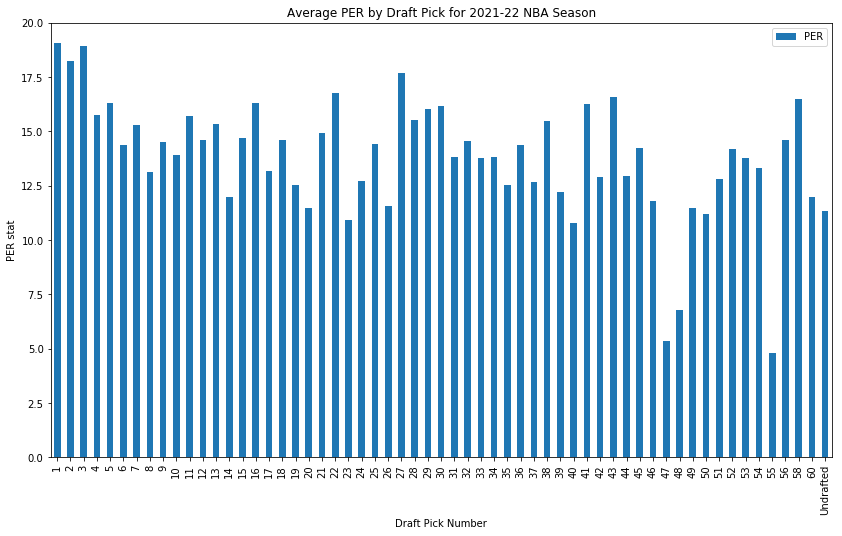

<Figure size 432x288 with 0 Axes>

In [101]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

avg_per_by_draft_pick
Per_by_draft_chart = avg_per_by_draft_pick.plot(x='DRAFT_NUMBER',
                                                kind='bar',figsize=(14,8),
    title = 'Average PER by Draft Pick for 2021-22 NBA Season')
Per_by_draft_chart.set_xlabel('Draft Pick Number')
Per_by_draft_chart.set_ylabel('PER stat')
plt.show()
plt.savefig('PER by Draft Pick')